In [1]:
import torch
import random
import matplotlib.pyplot as plt

## 生成数据集
---

In [2]:
def synthetic_data(w, b, num_examples):
    """生成 y = Xw+b 噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

In [3]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [4]:
print('features', features[0], '\nlabel:', labels[0])

features tensor([-1.0856,  1.5058]) 
label: tensor([-3.0793])


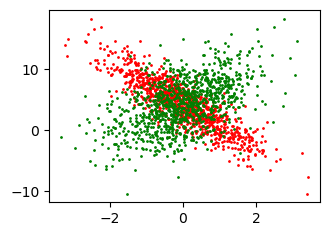

In [5]:
plt.rcParams['figure.figsize'] = (3.5, 2.5)
plt.scatter(features[:, 1].detach(), labels.detach(), 1, color='r')
plt.scatter(features[:, 0].detach(), labels.detach(), 1, color='g')

## 读取数据集
---

In [6]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i:min(i+batch_size, num_examples)]
        )
        yield features[batch_indices], labels[batch_indices]

In [7]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 1.5449, -0.5593],
        [-1.5971,  0.1919],
        [ 0.5555,  2.1422],
        [ 0.6678, -0.3875],
        [ 0.6146, -2.6526],
        [ 0.9732, -0.0316],
        [-0.9562, -1.9608],
        [ 0.8224,  1.0108],
        [-0.3464, -2.1620],
        [ 2.9120, -0.5063]]) 
 tensor([[ 9.1650],
        [ 0.3603],
        [-1.9662],
        [ 6.8446],
        [14.4463],
        [ 6.2423],
        [ 8.9527],
        [ 2.4078],
        [10.8579],
        [11.7492]])


## 初始化模型参数
---

In [8]:
w = torch.normal(0, 0.01, (2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

## 定义模型
---

In [9]:
def linreg(X, w, b):
    """线性回归模型"""
    return torch.matmul(X, w) + b

## 定义损失函数
---

In [10]:
def squared_loss(y_hat, y):
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

## 定义优化算法
---

In [11]:
def sgd(params, lr, batch_size):
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

## 训练
---

In [12]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch+1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.030194
epoch 2, loss 0.000103
epoch 3, loss 0.000049


In [13]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([ 0.0008, -0.0003], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0002], grad_fn=<RsubBackward1>)


## Exercises
---

1. 如果我们将权重初始化为零，会发生什么。算法仍然有效吗？

2. 假设试图为电压和电流的关系建立一个模型。自动微分可以用来学习模型的参数吗?

3. 能基于普朗克定律使用光谱能量密度来确定物体的温度吗？

4. 计算二阶导数时可能会遇到什么问题？这些问题可以如何解决？

In [14]:
x = torch.randn(2, requires_grad=True)
y = x**3

dy = torch.autograd.grad(y, x, grad_outputs=torch.ones(x.shape),retain_graph=True, create_graph=True)
dy2 = torch.autograd.grad(dy, x, grad_outputs=torch.ones(x.shape))
dy, dy2

((tensor([0.1826, 0.9546], grad_fn=<MulBackward0>),),
 (tensor([-1.4803,  3.3846]),))

5. 为什么在squared_loss函数中需要使用reshape函数？

6. 尝试使用不同的学习率，观察损失函数值下降的快慢。

7. 如果样本个数不能被批量大小整除，data_iter函数的行为会有什么变化？